In [1]:
import plotly.graph_objects as go
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [3]:
def sigmoid(z):
    
    g = 1.0/(1 + np.exp(-z)  )
    
    return g 


In [4]:
data = np.loadtxt(fname='ex2data2.txt', delimiter=',')

In [5]:
x = np.copy(data[:, :-1])
y = np.copy(data[:, -1])

In [6]:
positive = y == 1 
negative = y == 0 

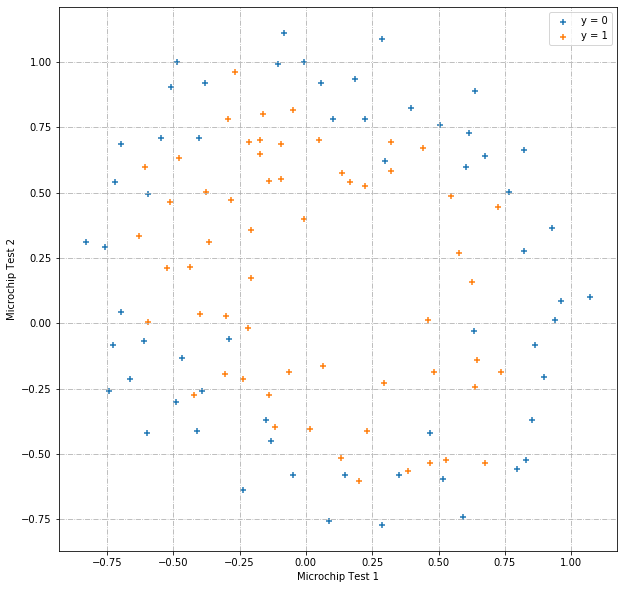

In [7]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

plt.scatter(x[negative,0], x[negative,1], marker='+' , label='y = 0' )
plt.scatter(x[positive,0], x[positive,1], marker='+' , label='y = 1' )
ax.set_xlabel("Microchip Test 1")
ax.set_ylabel("Microchip Test 2")

ax.legend()
plt.show()

In [8]:
trace_positive = go.Scatter(x=x[positive,0], y=x[positive,1] , mode='markers', name='y = 1', )
trace_negative = go.Scatter(x=x[negative,0], y=x[negative,1] , mode='markers', name='y = 0')

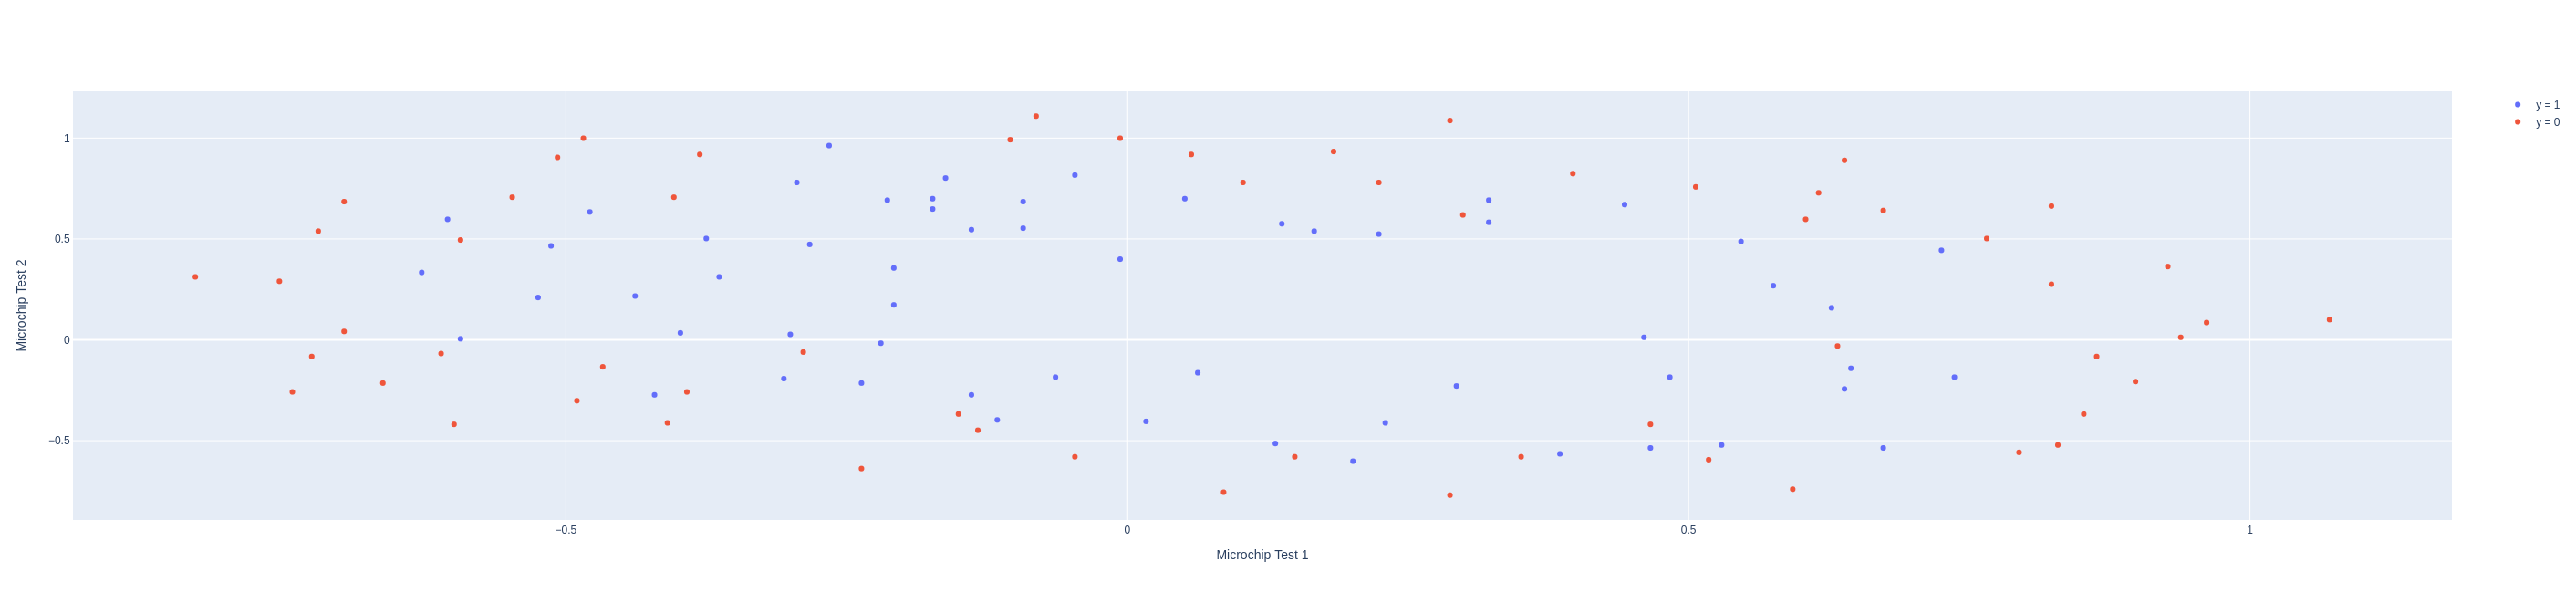

In [9]:
fig_plotly = go.Figure()

layout = go.Layout( autosize=False,
                    width=650,
                    height=650,
                    xaxis = dict( title_text = "Microchip Test 1"),
                    yaxis = dict( title_text = "Microchip Test 2") )

fig_plotly.layout = layout
fig_plotly.add_trace( trace_positive )
fig_plotly.add_trace( trace_negative )

# Part 1: Regularized Logistic Regression 

In [10]:
def mapFeature(x1, x2 ):
    
    
    degree = 6;
    
    n = int( (degree + 2 )*(degree +1 )/2 - 1 )
    out = np.ones([np.shape(x1)[0], n+1  ])
    column_number = 0 
    
    for i in range(1,degree+1):
        for j in range(i+1):
            column_number +=1 
            out[:, column_number] =  x1**(i-j)*x2**j
    
    return out
    

In [11]:
X = mapFeature(x[:,0], x[:,1] )

In [12]:
initial_theta = np.zeros(np.shape(X)[1])
initial_theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
lambda_val = 1

In [14]:
def costFunctionReg(theta, X, y, lambda_val):
    
    m = np.shape(y)[0]
    
    J = np.sum(-y *np.log( sigmoid( np.dot( X, theta ) ) ) - ( 1 - y )*np.log( 1 - sigmoid( np.dot( X,theta ) ) ))/m + lambda_val/(2*m)*np.dot(theta[1:], theta[1:])
    
    grad = np.dot((sigmoid( np.dot(X,theta) ) -y  ),X )/m
    grad[1:] = grad[1:] + lambda_val / (m) * theta[1:]
    
    return J, grad

In [15]:
cost, grad = costFunctionReg(initial_theta, X, y, lambda_val)

In [16]:
print(f'Cost at initial theta (zeros): { cost }')
print(f'Expected cost (approx): 0.693');
print(f'Gradient at initial theta (zeros) - first five values only:')
print(f' {grad[:5] }')
print(f'Expected gradients (approx) - first five values only:')
print(f' 0.0085 0.0188 0.0001 0.0503 0.0115')

Cost at initial theta (zeros): 0.6931471805599454
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only:
 0.0085 0.0188 0.0001 0.0503 0.0115


In [17]:
test_theta = np.ones(np.shape(X)[1])
test_theta

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
cost, grad = costFunctionReg(test_theta, X, y, 10)

In [19]:
print(f'Cost at test theta (with lambda = 10): {cost}');
print(f'Expected cost (approx): 3.16\n')
print(f'Gradient at test theta - first five values only:')
print(f' {grad[:5] } ')
print(f'Expected gradients (approx) - first five values only:');
print(f' 0.3460n 0.1614 0.1948 0.2269 0.0922')

Cost at test theta (with lambda = 10): 3.1645093316150095
Expected cost (approx): 3.16

Gradient at test theta - first five values only:
 [0.34604507 0.16135192 0.19479576 0.22686278 0.09218568] 
Expected gradients (approx) - first five values only:
 0.3460n 0.1614 0.1948 0.2269 0.0922


# Part 2: Regularization and Accuracies 

In [20]:
initial_theta = np.zeros(np.shape(X)[1])

In [21]:
lambda_val = 1

In [22]:
from scipy.optimize import minimize

In [23]:
def costFunctionReg2(theta, Xy):
    
    return costFunctionReg(theta, Xy[0], Xy[1], Xy[2] )[0]

In [24]:
constrains_args = [X, y, lambda_val]
options = {'disp':True, } 

In [25]:
res1 = minimize(costFunctionReg2, x0 = initial_theta, args=constrains_args, options ={'disp':True}, method='Nelder-Mead' )

In [26]:
res2 = minimize(costFunctionReg2, x0 = res1.x, args=constrains_args, options ={'disp':True}, method='Nelder-Mead' )

In [27]:
res2 = minimize(costFunctionReg2, x0 = res2.x, args=constrains_args, options ={'disp':True}, method='Nelder-Mead' )

In [28]:
theta = res2.x

##  Plot Boundary

In [29]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros([np.shape(u)[0],np.shape(v)[0]])

In [30]:
def mapFeature2(x1, x2 ):
    
    
    degree = 6;
    
    n = int( (degree + 2 )*(degree +1 )/2 - 1 )
    out = np.ones([np.shape(x1)[0], n+1  ])
    column_number = 0 
    
    for i in range(1,degree+1):
        for j in range(i+1):
            column_number +=1 
            out[:, column_number] =  x1**(i-j)*x2**j
    
    return out

In [31]:
for i in range(np.shape(u)[0]):
    for j in range(np.shape(v)[0]):
        z[i,j] = np.dot(mapFeature2(np.array([u[i]]), np.array([v[j]])), theta)

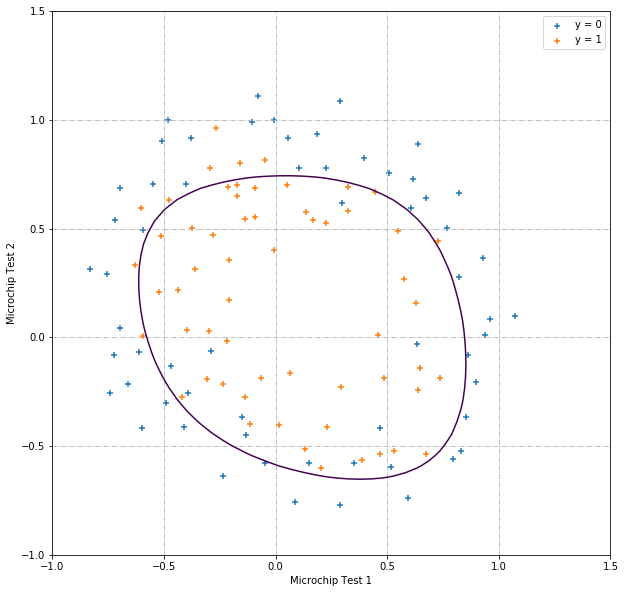

In [32]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

plt.scatter(x[negative,0], x[negative,1], marker='+' , label='y = 0' )
plt.scatter(x[positive,0], x[positive,1], marker='+' , label='y = 1' )
ax.contour(u, v, z, (0,) )
ax.set_xlabel("Microchip Test 1")
ax.set_ylabel("Microchip Test 2")

ax.legend()
plt.show()

In [33]:
boundary_contur = go.Contour(x=u , y=v ,z = z, contours=dict(start=0, end=0, size=70, coloring='lines'),  
                             contours_coloring='lines', line_width=1, name='Boundary')

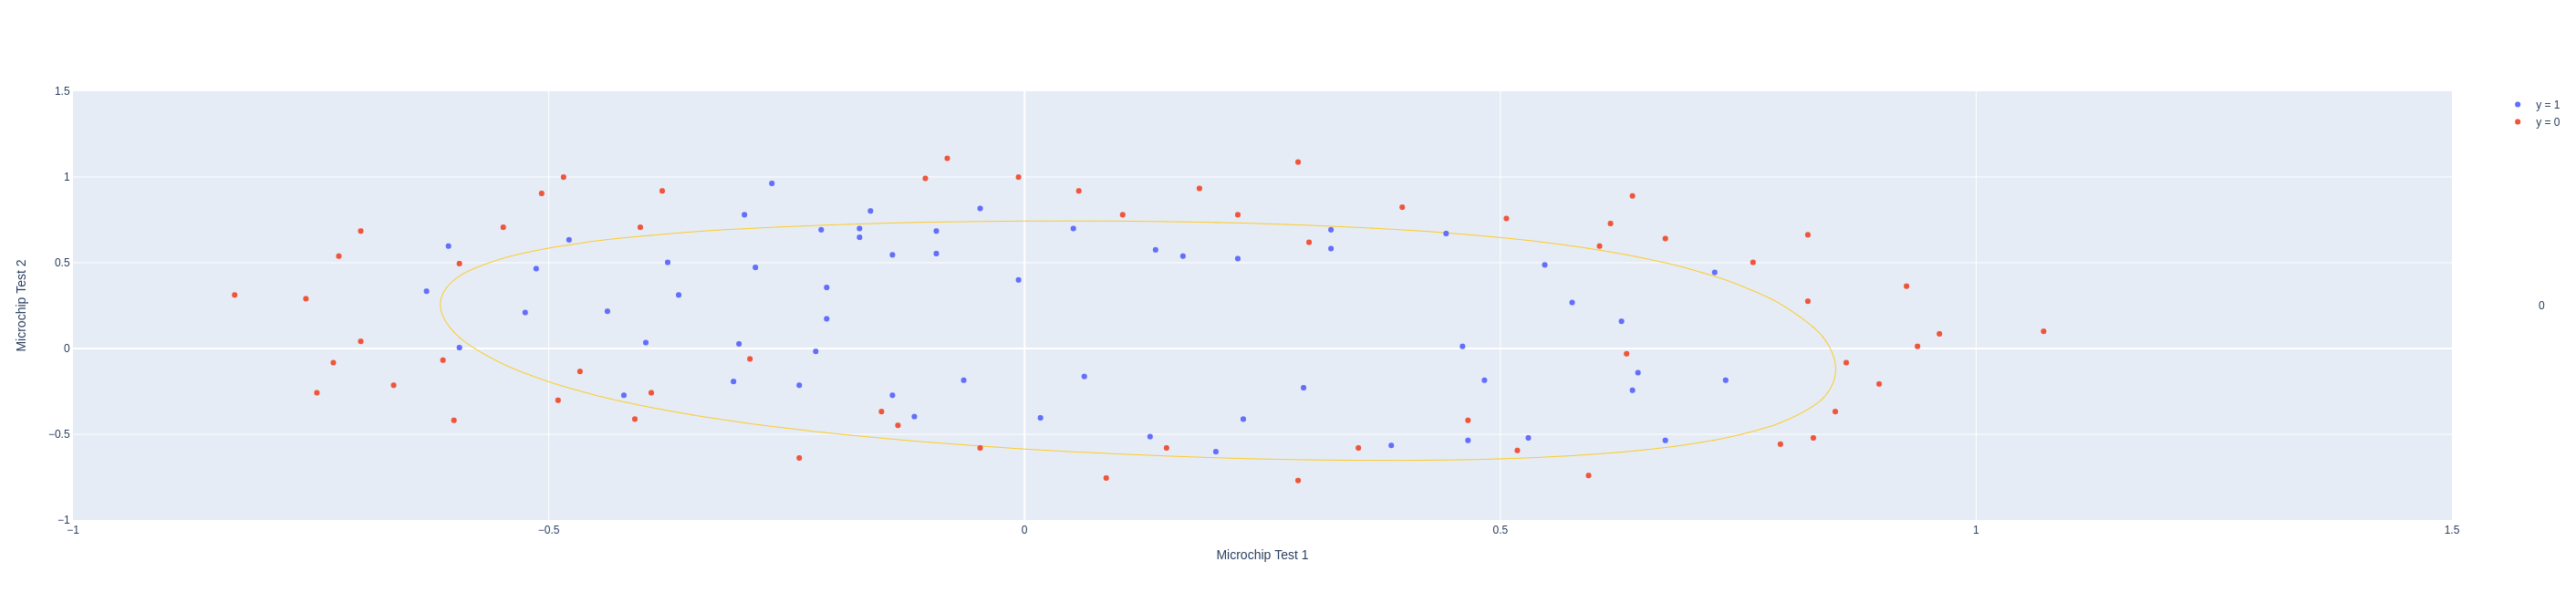

In [34]:
fig_plotly = go.Figure()

layout = go.Layout( autosize=False,
                    width=650,
                    height=650,
                    xaxis = dict( title_text = "Microchip Test 1"),
                    yaxis = dict( title_text = "Microchip Test 2") )

fig_plotly.layout = layout
fig_plotly.add_trace( trace_positive )
fig_plotly.add_trace( trace_negative )
fig_plotly.add_trace( boundary_contur  )

In [35]:
def predict(theta, X ):
    
    m = np.shape(X)[0]
    
    p = np.zeros(m)
    
    values = sigmoid( np.dot( np.array(X), theta ) )
    
    p[values>=0.5] =1
    
    return p

In [36]:
p = predict(theta, X)

In [37]:
print(f'Train Accuracy: {np.mean(p == y) * 100  } ')
print(f'Expected accuracy (with lambda = 1): 83.1 (approx)');

Train Accuracy: 83.05084745762711 
Expected accuracy (with lambda = 1): 83.1 (approx)
